In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [225]:
img1 = 255 - cv2.imread('../images/trimmed_queries_divorce/divorce/G/0_extraction_doc_12_line_33_char_40_original_trim.png', 0) 
img2 = 255 - cv2.imread('../images/trimmed_queries_divorce/queries/G/extraction_doc_13_line_7_char_17_original_trim.png', 0)
img3 = 255 - cv2.imread('../images/trimmed_queries_divorce/divorce/G/1_extraction_doc_5_line_35_char_49_original_trim.png', 0)

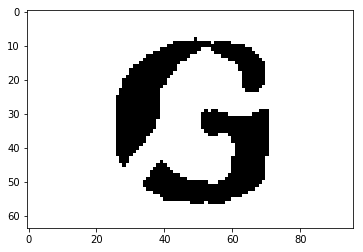

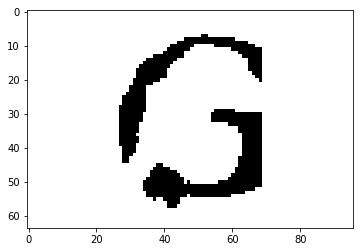

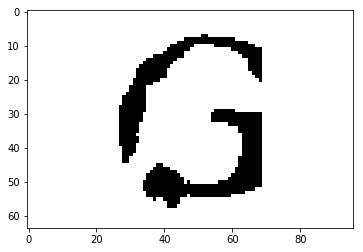

In [176]:
def create_rectangle(center, height, width, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)], [-1*np.sin(angle), np.cos(angle)]])
    corners = np.array([[width/2.0, width/2.0, -1*width/2.0, -1*width/2.0],
                       [height/2.0, -1*height/2.0, -1*height/2.0, height/2.0]])
    return np.transpose(np.matmul(rot_mat, corners) + np.array([[center[0]], [center[1]]])).astype(np.int32)

def bar_break(image, center = [38, 40], height = 7, width = 25, angle = 0.9):
    ar = np.zeros((64, 96))
    rect = create_rectangle(center, height, width, angle)
    cv2.fillConvexPoly(ar, rect, 255)
    imgnew = image - ar
    imgnew[np.where(imgnew < 0)] = 0
    return 255 - imgnew
    
imnew = bar_break(img1)
plt.imshow(imnew, cmap="gray")
plt.show()

imnew2 = bar_break(img2)
plt.imshow(imnew2, cmap="gray")
plt.show()

plt.imshow(255 - img2, cmap="gray")
plt.show()


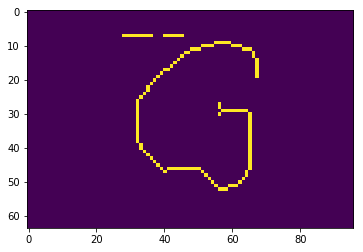

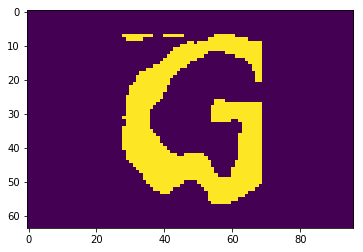

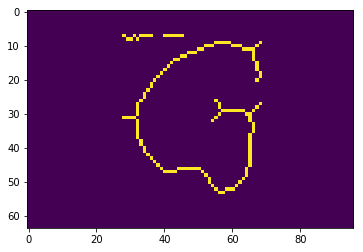

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [229]:
from skimage.morphology import skeletonize, medial_axis
imgnew = img3/255.0
imgnew

skeleton = skeletonize(imgnew)
plt.imshow(skeleton)
plt.show()

plt.imshow(img3)
plt.show()

med_ax, dist = medial_axis(imgnew, return_distance=True)
plt.imshow(med_ax)
plt.show()
dist

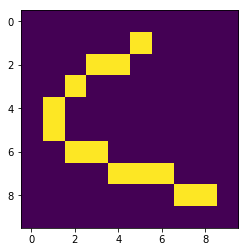

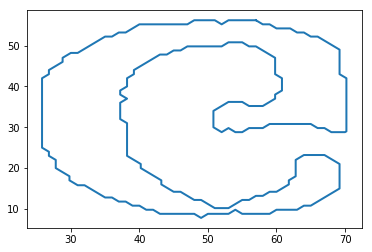

In [238]:
from skimage.draw import bezier_curve
img = np.zeros((10, 10), dtype=np.uint8)
rr, cc = bezier_curve(1, 5, 5, -2, 8, 8, 2)
img[rr, cc] = 1
plt.imshow(img)
plt.show()

from skimage.measure import find_contours
contours = find_contours(img1/255.0, 0.8)
plt.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2)
plt.show()